In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split,cross_val_score
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load your heart failure dataset (replace 'your_dataset.csv' with the actual filename)
data = pd.read_csv('heart_failure.csv')

# Split the data into features (X) and the target variable (y)
X = data.drop('DEATH_EVENT', axis=1)
Y = data['DEATH_EVENT']

#DATA SET INFO
Y.info()

#BALANCE
from imblearn.over_sampling import SMOTE
s1=SMOTE(random_state=0)
X_B,Y_B=s1.fit_resample(X,Y)

# #Apply PCA to reduce features
# import pandas as pd
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# k_best = SelectKBest(score_func=chi2, k=5)
# X_P = k_best.fit_transform(X_B, Y_B)


#CHEK BALANCE
Y_B.info()


from sklearn.tree import DecisionTreeClassifier
print("DT")
dt=RandomForestClassifier(n_estimators=10, random_state=0)
dtPre1=dt.fit(X_B, Y_B).predict_proba(X_B)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(dtPre1, Y_B, test_size=0.2, random_state=1, shuffle=True)
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

# Create individual ensemble models
rf_ensemble = RandomForestClassifier(n_estimators=30, random_state=0,)
knn_ensemble = KNeighborsClassifier(n_neighbors=2,weights='uniform',p=1)
gb_ensemble = GradientBoostingClassifier(n_estimators=30,random_state=0,learning_rate=0.1,max_depth=5,min_samples_split=2,min_samples_leaf=1,max_features='log2')

# Create a Voting ensemble
Clf= VotingClassifier(estimators=[('rf', rf_ensemble), ('knn', knn_ensemble), ('gb', gb_ensemble)], voting='soft')

# Train the Voting ensemble
Clf.fit(X_train, Y_train)

# Make predictions on the test set
start=time.time()
predictions = Clf.predict(X_test)
stop=time.time()
print(f"Training time: {stop - start}s")

# Evaluate the ensemble model
accuracy = accuracy_score(Y_test, predictions)
print("Ensemble Model Accuracy:", accuracy)

<class 'pandas.core.series.Series'>
RangeIndex: 299 entries, 0 to 298
Series name: DEATH_EVENT
Non-Null Count  Dtype
--------------  -----
299 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB
<class 'pandas.core.series.Series'>
RangeIndex: 406 entries, 0 to 405
Series name: DEATH_EVENT
Non-Null Count  Dtype
--------------  -----
406 non-null    int64
dtypes: int64(1)
memory usage: 3.3 KB
DT
Shape of training set: (324, 2)
Shape of test set: (82, 2)
Training time: 0.005378246307373047s
Ensemble Model Accuracy: 0.975609756097561


In [13]:
#KFOLD AND STANDARD DEVIATION
kf = KFold(n_splits=10, shuffle=True)
score = cross_val_score(Clf, dtPre1, Y_B, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))

0.9877 accuracy with a standard deviation of 0.0164


Classification Report:
Confusion Matrix: 
 [[42  1]
 [ 1 38]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.97      0.97      0.97        39

    accuracy                           0.98        82
   macro avg       0.98      0.98      0.98        82
weighted avg       0.98      0.98      0.98        82



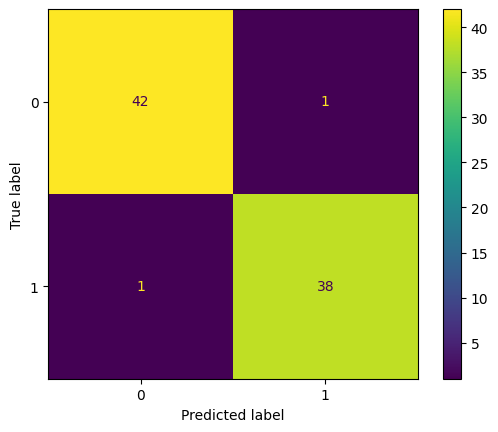

In [2]:
# Additional evaluation metrics
print("Classification Report:")
print("Confusion Matrix: \n", confusion_matrix(Y_test, predictions))
print("\n")
print(classification_report(Y_test, predictions))
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Clf.classes_)
disp.plot()
plt.savefig("savefig.jpg")
plt.show()

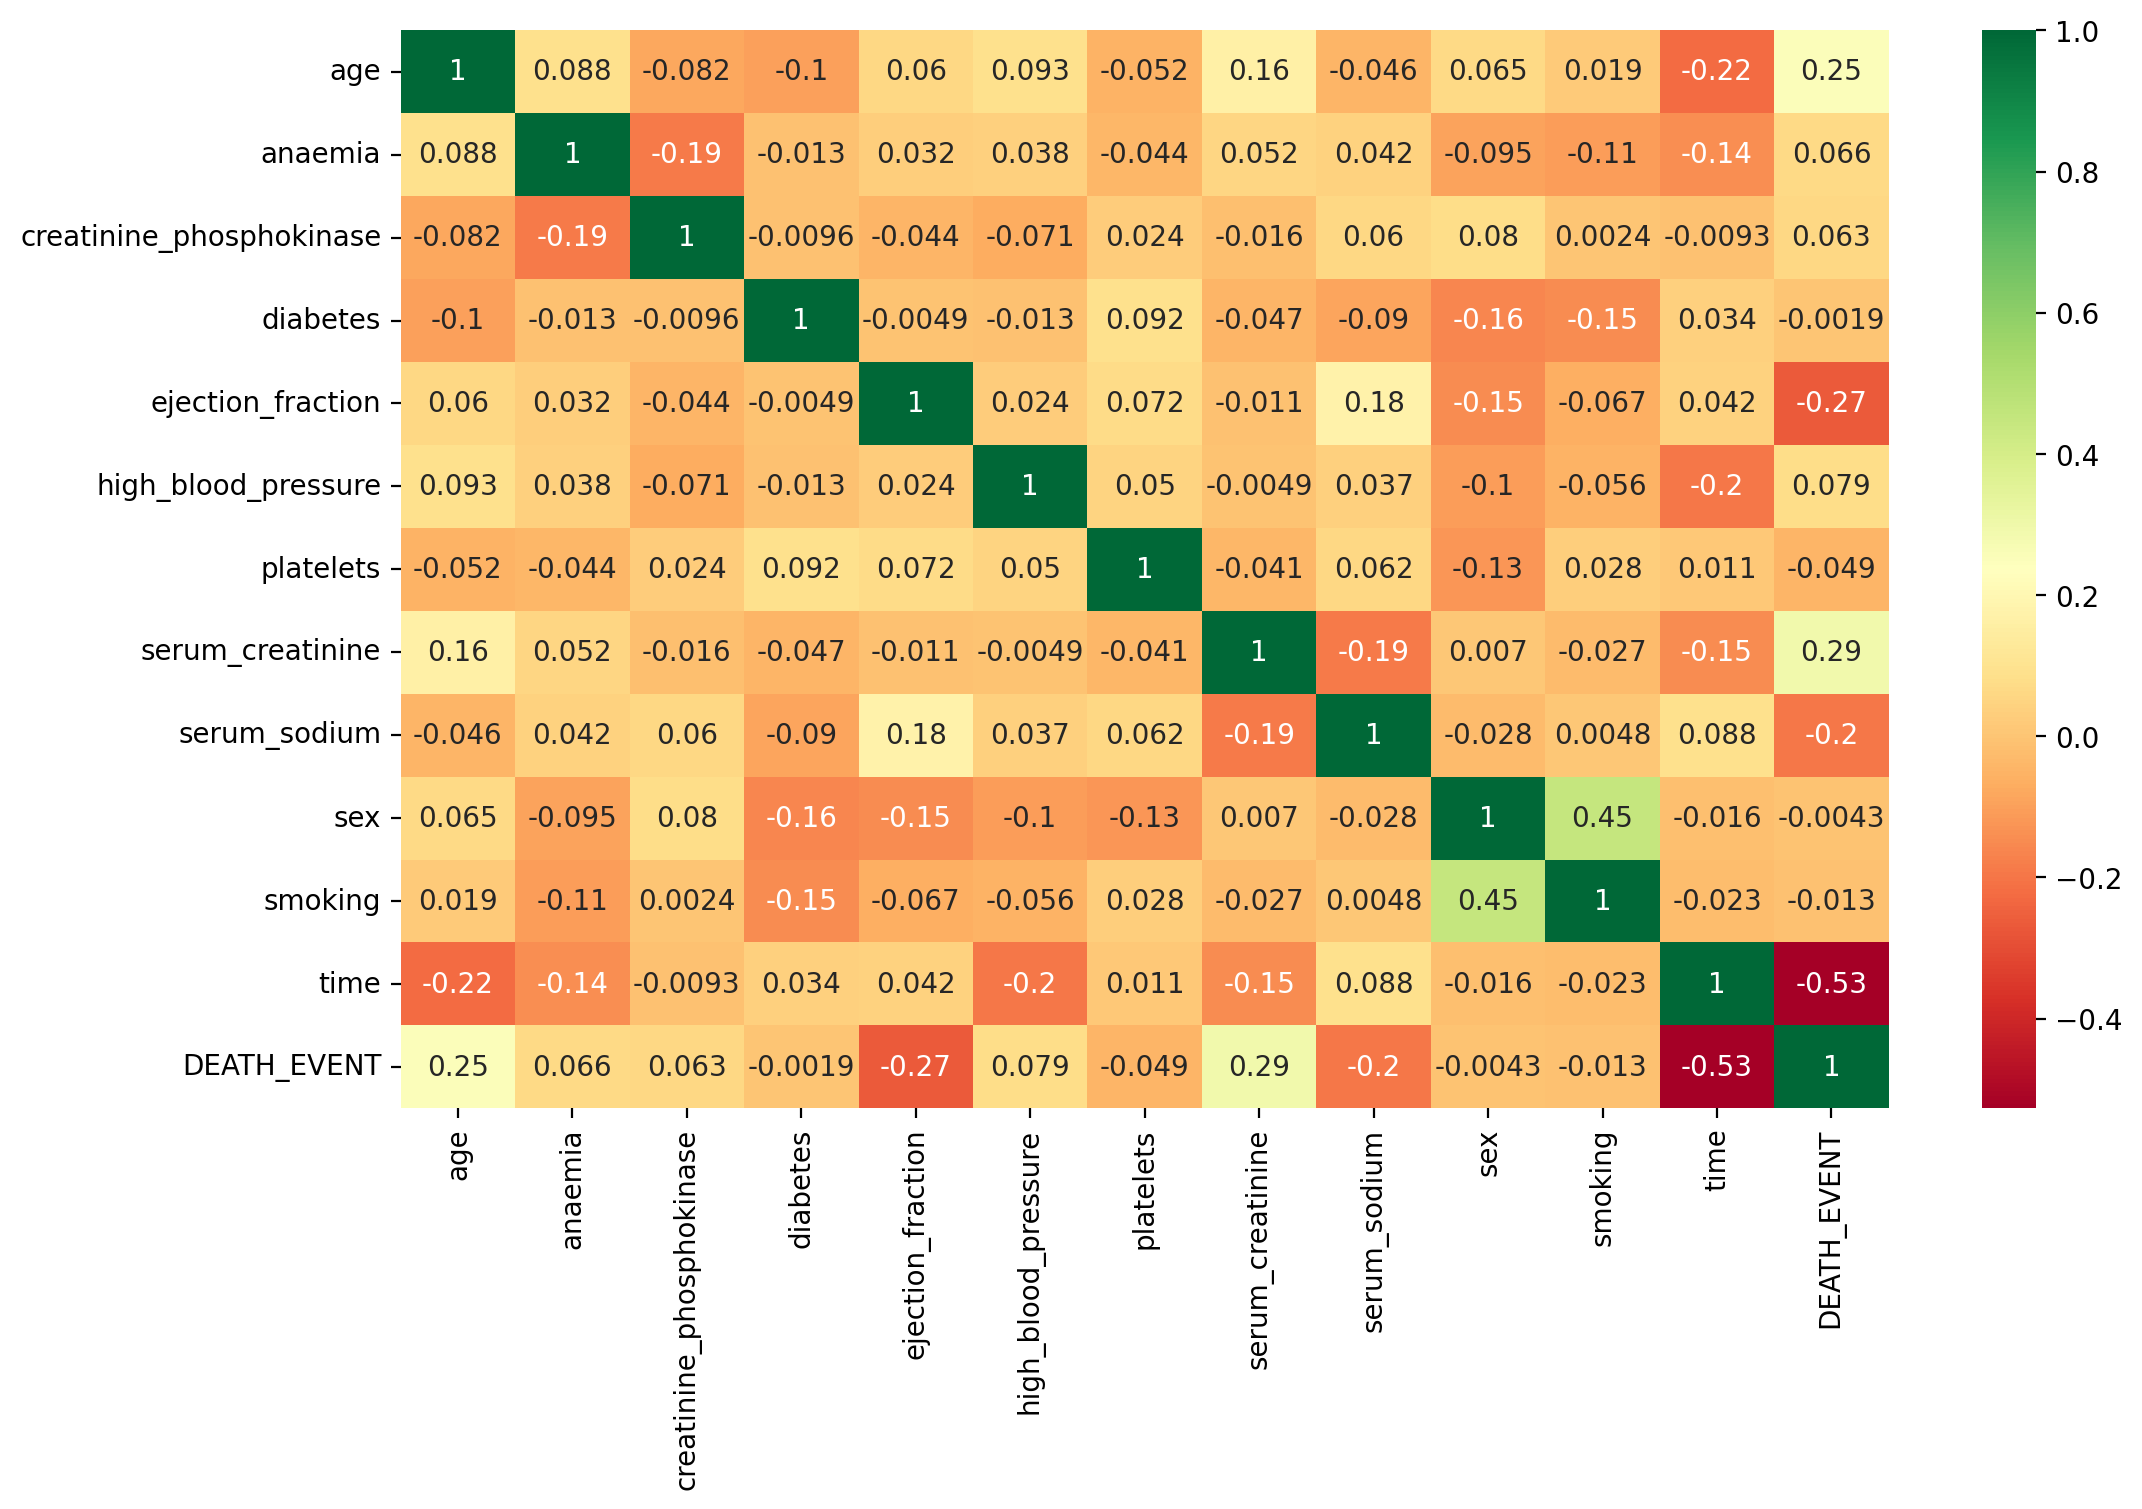

In [ ]:
#correlation graph
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,7),dpi=200)
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig("savefig.jpg")

0    203
1     96
Name: DEATH_EVENT, dtype: int64


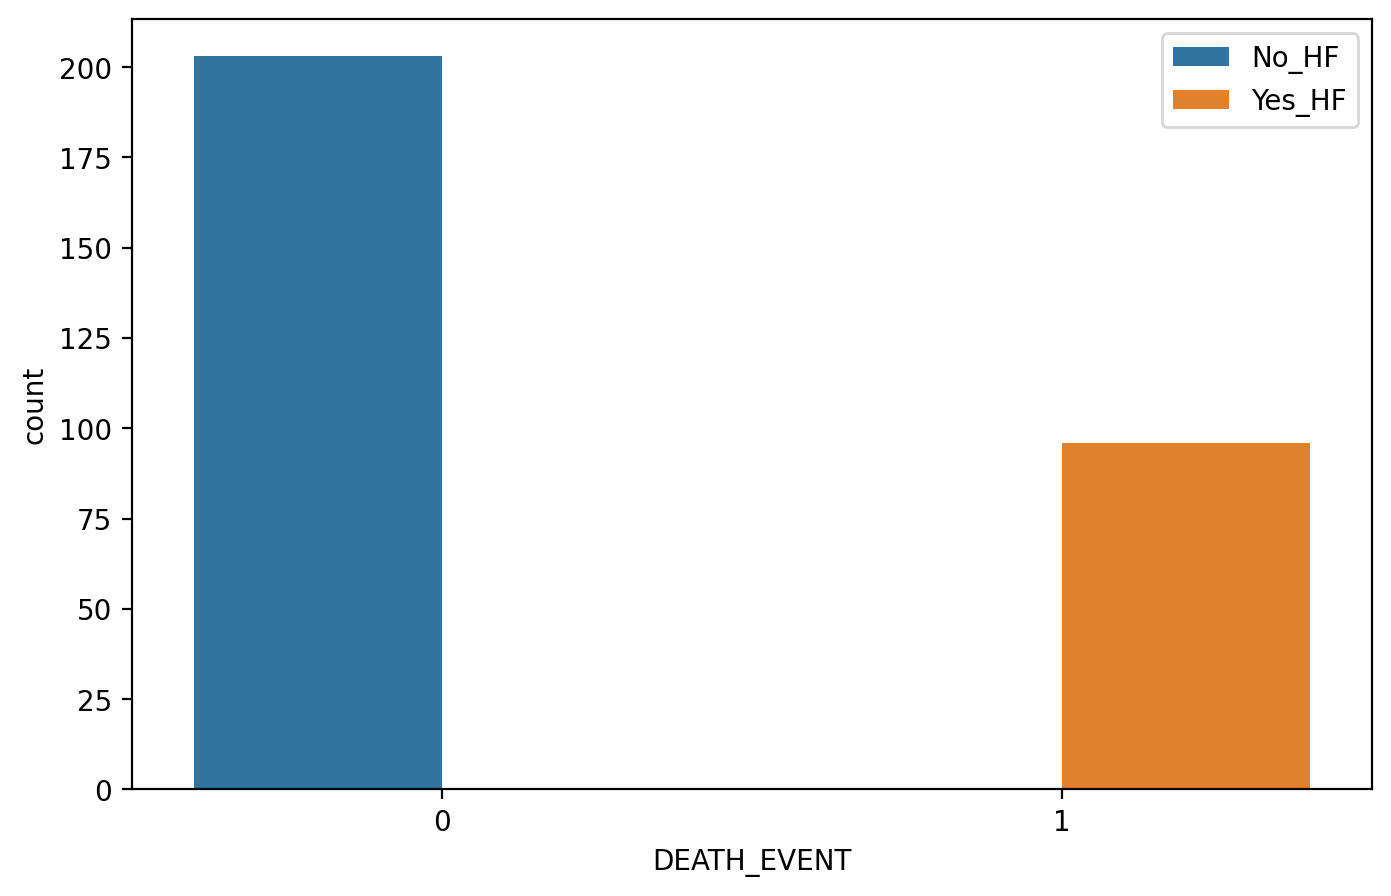

In [ ]:
print(data['DEATH_EVENT'].value_counts())
plt.figure(figsize=(8,5),dpi=200)
sns.countplot(x="DEATH_EVENT",hue="DEATH_EVENT",data=data)
plt.legend(labels=["No_HF","Yes_HF"], loc="upper right")
plt.savefig("savefig.jpg")
plt.show()

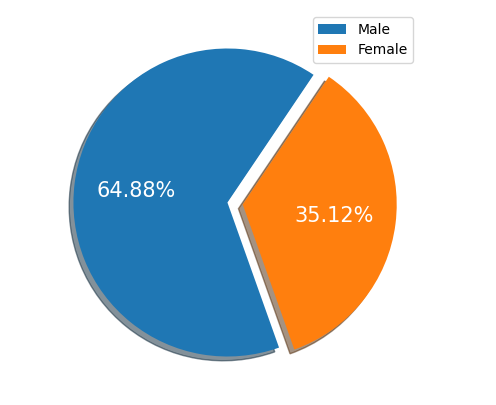

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(data.value_counts("sex"), labels=["Male","Female"], explode=(0, 0.1), autopct="%.2f%%", textprops={"fontsize":15, "color":"w"}, shadow=True, startangle=56)
plt.legend()
plt.savefig("savefig.jpg")
plt.show()

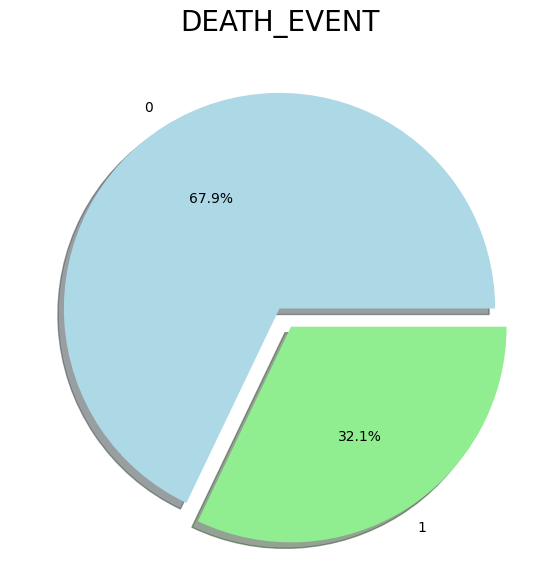

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(data['DEATH_EVENT'].value_counts(),labels=['0','1'],autopct='%1.1f%%',shadow=True,explode=[0,0.1], colors = ['lightblue','lightgreen'])
plt.title('DEATH_EVENT',fontsize=20)
plt.savefig("savefig.jpg")
plt.show()